# LGBM & XGBM

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Titanic dataset
train_data = pd.read_csv('/content/Titanic_train.csv')
test_data = pd.read_csv('/content/Titanic_test.csv')

In [4]:
# Combine train and test datasets for unified preprocessing
data = pd.concat([train_data, test_data], sort=False)

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
# Exploratory Data Analysis (EDA)
print(data.info())  # Check for missing values and data types
print(data.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None
       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0

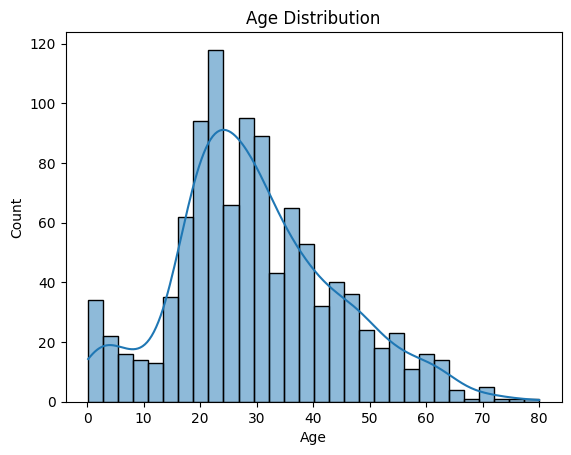

In [7]:
# Visualize distributions
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [9]:
data.reset_index(drop=True, inplace=True)


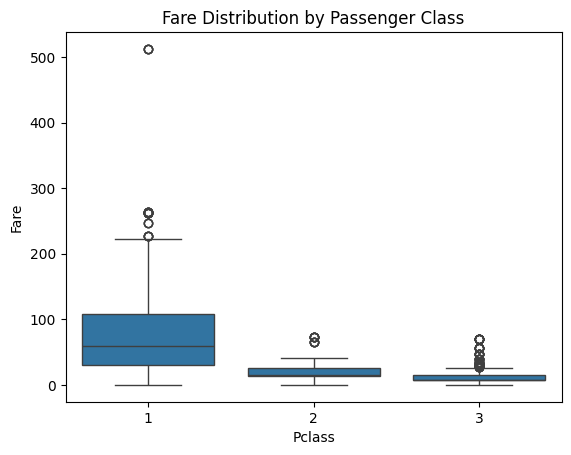

In [10]:
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Fare Distribution by Passenger Class')
plt.show()

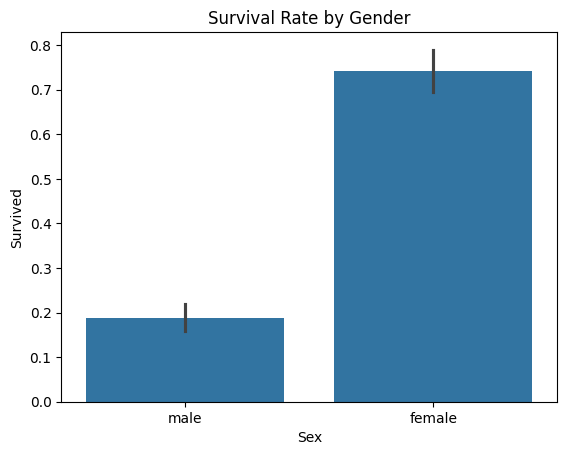

In [11]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()

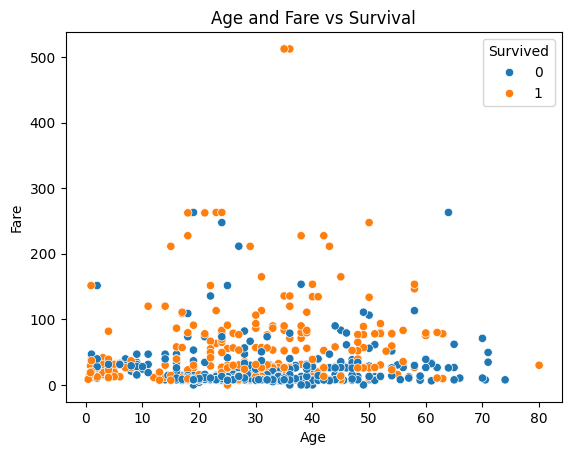

In [12]:
# Scatter plot for Age and Fare vs Survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Age and Fare vs Survival')
plt.show()

In [13]:
# Data Preprocessing
# Impute missing values
imputer = SimpleImputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])
data['Fare'] = imputer.fit_transform(data[['Fare']])
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [14]:
# Encode categorical variables
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])  # Male=1, Female=0
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [15]:
# Split back into train and test sets
train_data = data[:len(train_data)]
test_data = data[len(train_data):]

In [16]:
# Define features and target
X = train_data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = train_data['Survived']
X_test = test_data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])

In [17]:
# Split data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Evaluation metrics function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    return accuracy, precision, recall, f1

In [21]:
pip install lightgbm xgboost

In [22]:
# LightGBM Model
print("LightGBM Model")
lgb_train = lgb.Dataset(X_train, y_train)
params = {'objective': 'binary', 'boosting_type': 'gbdt', 'metric': 'binary_logloss'}
lgb_model = lgb.train(params, lgb_train, num_boost_round=100)


LightGBM Model
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [20]:
lgb

<module 'lightgbm' from '/usr/local/lib/python3.10/dist-packages/lightgbm/__init__.py'>

In [23]:
# LightGBM Model
print("LightGBM Model")
lgb_train = lgb.Dataset(X_train, y_train)
params = {'objective': 'binary', 'boosting_type': 'gbdt', 'metric': 'binary_logloss'}
lgb_model = lgb.train(params, lgb_train, num_boost_round=100)

LightGBM Model
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.154792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [24]:
y_lgb_pred = (lgb_model.predict(X_val) > 0.5).astype(int)
evaluate_model(y_val, y_lgb_pred)

Accuracy: 0.8268, Precision: 0.7945, Recall: 0.7838, F1 Score: 0.7891


(0.8268156424581006,
 0.7945205479452054,
 0.7837837837837838,
 0.7891156462585034)

In [25]:
# XGBoost Model
print("XGBoost Model")
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)

XGBoost Model


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [26]:
y_xgb_pred = xgb_model.predict(X_val)
evaluate_model(y_val, y_xgb_pred)

Accuracy: 0.8212, Precision: 0.8000, Recall: 0.7568, F1 Score: 0.7778


(0.8212290502793296, 0.8, 0.7567567567567568, 0.7777777777777778)

In [27]:
# Comparative Analysis Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_scores = evaluate_model(y_val, y_lgb_pred)
xgb_scores = evaluate_model(y_val, y_xgb_pred)

Accuracy: 0.8268, Precision: 0.7945, Recall: 0.7838, F1 Score: 0.7891
Accuracy: 0.8212, Precision: 0.8000, Recall: 0.7568, F1 Score: 0.7778


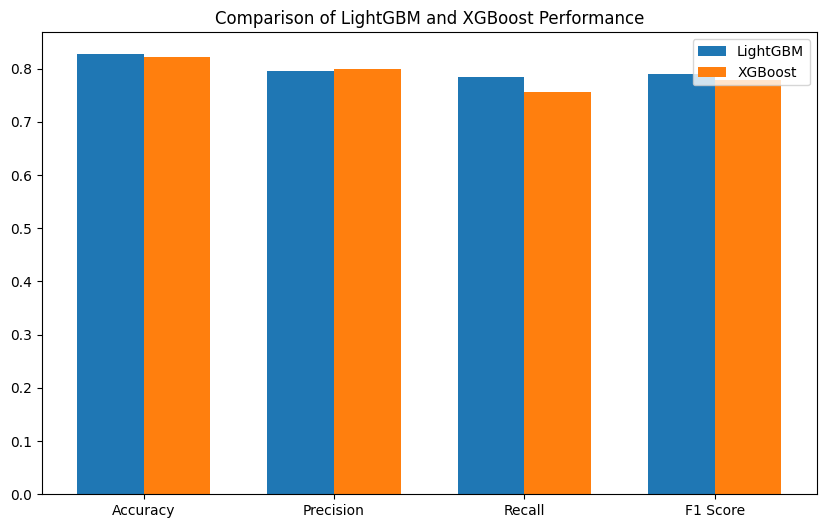

In [28]:
# Plot comparison
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35
ax.bar(x - width/2, lgb_scores, width, label='LightGBM')
ax.bar(x + width/2, xgb_scores, width, label='XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.title("Comparison of LightGBM and XGBoost Performance")
plt.show()

# A brief report summarizing the comparative analysis results and practical implications.

Code Explanation:

Data Loading and EDA:

Loads the dataset, checks missing values, and examines feature distributions.

Visualizes distributions of key features, along with relationships between features and target.

Data Preprocessing:

Handles missing values in Age, Fare, and Embarked.

Encodes categorical variables (Sex using LabelEncoder, Embarked using one-hot encoding).

Removes unnecessary columns and splits back into train and test data.

Building Predictive Models:

LightGBM and XGBoost models are initialized and trained on the training dataset.

The evaluation function is defined to calculate accuracy, precision, recall, and F1-score.

Comparative Analysis:

Both models' performance metrics are printed and compared using a bar plot for better visualization.